$$
\fbox{Projet Num√©rique: √©quations diff√©rentielles}
$$
$\underline{Mathilde~Ceripa~et~Ma√´lle~Thaller}$

Les √©quations de Lotka-Volterra, ou ‚Äúmod√®le proie-pr√©dateur‚Äù, sont couramment utilis√©es pour d√©crire la dynamique de syst√®mes biologiques dans lesquels unpr√©dateur et sa proie interagissent dans un milieu commun. Elles ont √©t√© propos√©es ind√©pendamment par A. J. Lotka en 1925 et V. Volterra en 1926 et s‚Äô√©crivent dela mani√®re suivante : Ãá
$$
\left\{ 
     \begin{array}
        \\{x'_1}={x_1}(Œ±‚àíŒ≤ \cdot {x_2})\\
        {x'_2}=‚àí{x_2}(Œ≥‚àíŒ¥ \cdot {x_1})
    \end{array}
\right.
$$
o√π ${x_1}$ et ${x_2}$ d√©signent le nombre (positif) de proies et de pr√©dateurs respectivement et $Œ±,Œ≤,Œ≥,Œ¥$ sont des param√®tres strictement positifs.

$\underline{inventaire~des~fonctions~du~cours~utilis√©es~dans~le~projet~:}$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import *

def Q(f, xs, ys):
    X, Y = np.meshgrid(xs, ys)
    fx = np.vectorize(lambda x, y: f([x, y])[0])
    fy = np.vectorize(lambda x, y: f([x, y])[1])
    return X, Y, fx(X, Y), fy(X, Y)

alpha=2/3 
beta=4/3
gamma=1
delta=1 #valeurs trouv√©es sur wikip√©dia

# Python Standard Library
# -----------------------
pass

# Third-Party Libraries
# ---------------------

# Autograd & Numpy
import autograd
import autograd.numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] # [width, height] (inches). 

# Jupyter & IPython
from IPython.display import display

def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

$\underline{Question~1:}$ 

Donner une interpr√©tation physique √† chaque terme de la dynamique. Montrer qu‚Äôil existe deux points d‚Äô√©quilibre $(0,0)$ et ÃÑ$ÃÑx \in \mathbb{R_{>0}}√ó\mathbb{R_{>0}}$. Que peut-on dire de leur stabilit√© √† ce stade ?

En identifiant dans les √©quations diff√©rentielles ci-dessus les diff√©rents termes, on peut affirmer que:
$$
\left\{ 
     \begin{array}
        \ \alpha: taux ~ de ~ reproduction ~ chez ~ les ~ proies\\
        \beta: taux~ de ~ mortalit√©~chez~les~proies~√†~cause~des~prodateurs~(fonction ~ de~ la fr√©quence~ de ~ leurs ~roncontres)\\
        \gamma: taux ~ de ~ mortalit√©~naturelle~chez~les~pr√©dateurs\\
        \delta: taux~de~reproduction~chez~les~pr√©dateurs~(fonction~des~proies~rencontr√©es~et~mang√©es)
    \end{array}
\right.
$$

On souhaite √† pr√©sent montrer qu'il existe deux points d'√©quilibre dans cette situation. On rappelle qu'on peut mod√©liser la situation ainsi:
On pose: 
$$
\overrightarrow{x}=\begin{pmatrix} 
    {x_1} \\ 
    {x_2} 
\end{pmatrix}
$$
et: 
$$
f(\overrightarrow{x})=\begin{pmatrix} 
    {x_1} \cdot \alpha - \beta \cdot {x_2} \cdot {x_1}\\ 
    -{x_2} \cdot \gamma + {x_2} \cdot \delta \cdot {x_1}
\end{pmatrix}
$$
On obtient alors l'√©quation diff√©rentielle suivante:
$$
\overrightarrow{x'}=f(\overrightarrow{x})
$$
Montrer qu'il existe deux points d'√©quilibre $ÃÑx$ et $(0,0)$ revient alors √† montrer que pour ces deux points: $f(\overrightarrow{x})=0$.

- On prend tout d'abord: $({x_1},{x_2})=(0,0)$. On a alors: 
$$
f(\overrightarrow{x})=\begin{pmatrix} 
    0 \cdot \alpha - \beta \cdot 0 \cdot 0\\ 
    -0 \cdot \gamma + 0 \cdot \delta \cdot 0
\end{pmatrix} = \begin{pmatrix} 
    0 \\ 
    0
\end{pmatrix}
$$
Le couple $(0,0)$ est donc bien un point d'√©quilibre. 

- On pose √† pr√©sent: $ÃÑx=({x_1},{x_2})$. Il s'agit alors de r√©soudre le syst√®me suivant:
$$
\left\{ 
     \begin{array}
        \  {x_1} \cdot \alpha - \beta \cdot {x_2} \cdot {x_1}=0 \\
        -{x_2} \cdot \gamma + {x_2} \cdot \delta \cdot {x_1} =0 \\
        {x_1}>0 \\
        {x_2}>0
    \end{array}
\right.
$$
Il existe une solution √† ce syst√®me, donc il existe bien un deuxi√®me point d'√©quilibre $ÃÑx=({x_1},{x_2})$ tel que ${x_1}>0$ et ${x_2}>0$ : 
$$
\overrightarrow{x}=\begin{pmatrix} 
    \frac{\gamma}{\delta} \\ 
    \frac{\alpha}{\beta}
\end{pmatrix}
$$

Pour √©tudier la stabilit√© de ces points d'√©quilibre, on va s'int√©resser aux valeurs propres de la jacobienne de f √©valu√©e en ces deux points,car $f:X‚Üí\mathbb{R_{2}}$ est contin√ªment diff√©rentiable: 
$$
{J_f}=\begin{pmatrix} 
    \alpha - \beta \cdot {x_2} & -\beta \cdot {x_1}\\ 
    \delta \cdot {x_2} & -\gamma + \delta \cdot {x_1}
\end{pmatrix} 
$$

On a alors:
- En $({x_1},{x_2})=(0,0)$:
$$
Jf(0,0)=\begin{pmatrix} 
    \alpha & 0\\ 
    0 & -\gamma 
\end{pmatrix}
$$ 
qui a pour valeurs propres: ${\lambda_1}=\alpha$ et ${\lambda_2}=-\gamma$. Or, on sait que si une des parties r√©elles de ${\lambda_1}$ ou ${\lambda_2}$ est strictement positive, ce qui est le cas ici, le point d'√©quilibre est instable. Le point $(0,0)$ est donc $\underline{instable}$.
- En $({x_1},{x_2})=(\frac{\gamma}{\delta},\frac{\alpha}{\beta})$ :
$$
Jf(\frac{\gamma}{\delta},\frac{\alpha}{\beta})=\begin{pmatrix} 
    0 & -\delta \cdot \frac{\gamma}{\delta}\\ 
    \delta \cdot \frac{\alpha}{\beta} & 0
\end{pmatrix}
$$ 
Apr√®s des caluls non d√©taill√©s ici, on obtient les valeurs propres suivantes: ${\lambda_1}=i \sqrt(\alpha \cdot \gamma)$ et ${\lambda_2}=-i \sqrt(\alpha \cdot \gamma)$. Ici, les deux parties r√©elles des valeurs propres sont nulles, et on ne peut donc pas en conclure la stabilit√© du point $x$ pour le moment.

$\underline{Question~2:}$

A l‚Äôaide des fonctions $meshgrid$ et $quiver$, visualiser graphiquement le champ de vecteurs. Intuiter le comportement des solutions. On pourra aussi utiliser $streamplot$ pour visualiser le portrait de phase.

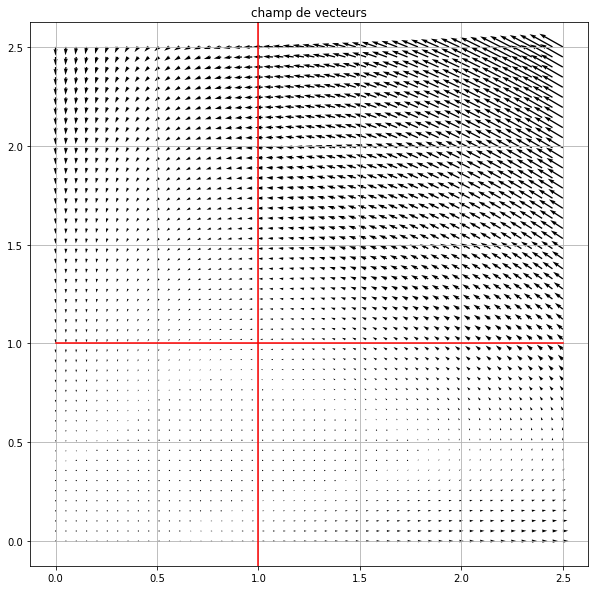

In [2]:
def f(x):
    x1,x2=x
    dx1=x1*alpha-beta*x1*x2
    dx2=-x2*gamma+x2*x1*delta
    return np.array([dx1,dx2])

'''champ de vecteurs'''
figure,ax=plt.subplots()

x1=np.linspace(0,2.5,50)
x2=np.linspace(0,2.5,50)
y1=[1 for i in x1]

X,Y=np.meshgrid(x1,x2)
Z1,Z2=f([X,Y])
plt.quiver(X,Y,Z1,Z2)
plt.plot(x1,y1,color="red")
plt.axvline(x=1.0,color='red')
plt.grid(True)
plt.title('champ de vecteurs')
plt.show();

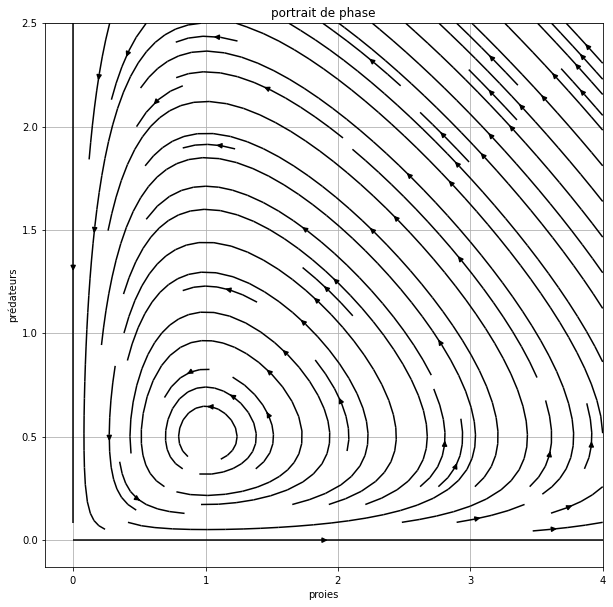

In [3]:
'''portrait de phase'''
plt.figure()
x1=np.linspace(0,4,100)
x2=np.linspace(0,2.5,100)
plt.grid(True)
plt.title('portrait de phase')
plt.xlabel('proies')
plt.ylabel('pr√©dateurs')
plt.xticks([0, 1,2,3,4], ["$0$", "$1$", "$2$","$3$","$4$"])
plt.streamplot(*Q(f, x1, x2), color="k") ;

On observe gr√¢ce aux courbes pr√©c√©dentes que le portrait de phase pr√©sente des courbes ferm√©es, ovales. On peut donc en d√©duire que les solutions seront p√©riodiques. La forme non ronde de ces derni√®re sugg√®re que l'√©volution des deux populations est li√©e mais se fait de fa√ßon d√©cal√©e, non simultan√©e.  
Par ailleurs, on peut distinguer 4 domaines dans le champ de vecteurs, s√©par√©s par des traits rouge sur le premier graphiques et la trajectoire semble tourner au sein de ces diff√©rentes parties. 

$\underline{Question~3:}$

Par le th√©or√®me de Cauchy-Lipschitz, d√©montrer que toute solution initialis√©e dans $\mathbb{R_{>0}}√ó\mathbb{R_{>0}}$ reste dans $\mathbb{R_{>0}}√ó\mathbb{R_{>0}}$ sur son ensemble de d√©finition (ce qui est n√©cessaire pour que ${x_1}$ et ${x_2}$ repr√©sentent des populations r√©elles).

D'apr√®s le th√©or√®me des valeurs interm√©diaires, montrer qu'une solution initialis√©e dans $\mathbb{R_{>0}}√ó\mathbb{R_{>0}}$ reste dans $\mathbb{R_{>0}}√ó\mathbb{R_{>0}}$ revient √† montrer qu'elle ne peut pas s'annuler.

- On raisonne √† pr√©sent par l'absurde. On suppose qu'il existe une solution $\overrightarrow{x}$ initialis√©e dans $\mathbb{R_{>0}}√ó\mathbb{R_{>0}}$ qui s'annule √† un temps donn√© ${t_k}$. On effectue une translation du probl√®me pour avoir ${t_0}={t_k}$ et on consid√®re le probl√®me de Cauchy suivant:
$$
\left\{ 
     \begin{array}
        \ \overrightarrow{x'}=f(\overrightarrow{x}) \\
        \ \overrightarrow{x}({t_k})= \overrightarrow{0}
    \end{array}
\right.
$$

- Or, on sait que la fonction $f:X‚Üí\mathbb{R_{2}}$ explicit√©e pr√©c√©demment est continuement diff√©rentiable. Ainsi, d'apr√®s le th√©or√®me de Cauchy Lipschitz, on peut affirmer que pour tout $\overrightarrow{x_k} \in \mathbb{R}√ó \mathbb{R}$, il existe une unique solution maximale $\overrightarrow{x}$ dans ${S_f}(\overrightarrow{x_k})$. 

- On peut donc en conclure, de fa√ßon locale, qu'il existe une unique fonction $x \in Sf({x_k})$ d√©finie sur$ [{t_k}‚àí{\tau},{t_k}+{\tau}]$ o√π $\tau > 0$

- Or, on sait, de fa√ßon triviale, que si ${x_{10}}=0$, la fonction $x:\mathbb{R} ‚Üí (0,\exp{-t} *{x_20})$ est solution du probl√®me de Cauchy ci dessus. De m√™me, si que si ${x_{20}}=0$, la fonction $x:\mathbb{R} ‚Üí ({x_0}* \exp{-t},0)$ est solution du probl√®me de Cauchy ci dessus. 

- Ainsi, on aboutit √† une contradiction car $\overrightarrow{x}$ ne peut s'annuler en ${t_k}$, car sinon elle serait elle aussi solution de ce probl√®me de Cauchy sur $ [{t_k}‚àí{\tau},{t_k}+{\tau}]$. 

On peut donc en d√©duire la conclusion voulue.

$\underline{Question~4:}$

On consid√®re la fonction $H({x_1},{x_2}) =Œ¥{x_1}‚àíŒ≥ln{x_1}+Œ≤{x_2}‚àíŒ±ln{x_2}$ d√©finie sur $\mathbb{R_{>0}}√ó\mathbb{R_{>0}}$. Calculer la d√©riv√©e de H le long des solutions initialis√©es dans $\mathbb{R_{>0}}√ó\mathbb{R_{>0}}$. En d√©duire que toute solution maximale initialis√©e dans $\mathbb{R_{>0}}√ó\mathbb{R_{>0}}$ est d√©finie sur $\mathbb{R}$.

- On a vu que pour une solution initialis√©e dans $\mathbb{R_{>0}}√ó\mathbb{R_{>0}}$, on a √† tout instant t $({x_1}(t),{x_2}(t))\in \mathbb{R_{>0}}√ó\mathbb{R_{>0}}$, H est donc bien d√©finie et d√©rivable le long des solutions initialis√©es dans $\mathbb{R_{>0}}√ó\mathbb{R_{>0}}$.
  
  Soit $({x_1},{x_2})$ une solution initialis√©e dans $\mathbb{R_{>0}}√ó\mathbb{R_{>0}}$ et $I$ son intervalle de d√©finition.
  
  $\forall t \in I$, $H'({x_1}(t),{x_2}(t))= Œ¥ \cdot {x'_1}(t)‚àíŒ≥ \cdot \frac{{x'_1}(t)}{{x_1}(t)}+Œ≤ \cdot {x'_2}(t)‚àíŒ± \cdot \frac{{x'_2}(t)}{{x_2}(t)}$
  
  Or on sait que :
$$
\left\{ 
     \begin{array}
        \\{x'_1}={x_1}(Œ±‚àíŒ≤ \cdot {x_2})\\
        {x'_2}=‚àí{x_2}(Œ≥‚àíŒ¥ \cdot {x_1})
    \end{array}
\right.
$$

  Donc
$\forall t \in I$, $H'({x_1}(t),{x_2}(t))=Œ¥ \cdot {x_1}(Œ±‚àíŒ≤ \cdot {x_2}) - Œ≥ \cdot (Œ±‚àíŒ≤ \cdot {x_2}) - Œ≤ \cdot {x_2}(Œ≥‚àíŒ¥ \cdot {x_1}) + Œ± \cdot (Œ≥‚àíŒ¥ \cdot {x_1})$

  Finalement,
$\forall t \in I$, $H'({x_1}(t),{x_2}(t))=0$

  Donc $H$ est constante sur $I$.
  
  
  
- Montrons que $I=\mathbb{R}$
On suppose que $I$ est un intervalle ouvert.
  
  On pose $I= ]a,b[$. En raisonnant par l'absurde, on suppose *a* et $b$ finis. 
  
  Comme $H$ est constante sur $I$, $({x_1},{x_2})$ est born√© sur $I$ √©tant donn√© la forme de $H$, donc les limites de la norme de $x$ en a et b sont finies. D'apr√®s le th√©or√®me du domaine maximal d'existence, si a est fini, alors :
  
  $\lim\limits_{\substack{t \rightarrow a }} d((t,x(t)), \partial(\mathbb{R}√ó\mathbb{R^{n}})=0$, donc $a = -\infty$ ou $a= +\infty$, ce qui est absurde car on suppos√© $a$ fini.
  
  Donc $a=-\infty$, de m√™me, $b=+\infty$.

  Par cons√©quent $I= \mathbb{R}$.
  Donc, toute solution maximale initialis√©e dans $\mathbb{R_{>0}}√ó\mathbb{R_{>0}}$ est d√©finie sur $\mathbb{R}$.

$\underline{Question~5:}$

Repr√©senter les courbes de niveau de H.  O√π se trouve ÃÑx ? Qu‚Äôen conclut-on sur le comportement des solutions ? En d√©duire (graphiquement) que ÃÑx est stable, au sens de la d√©finition de stabilit√©.


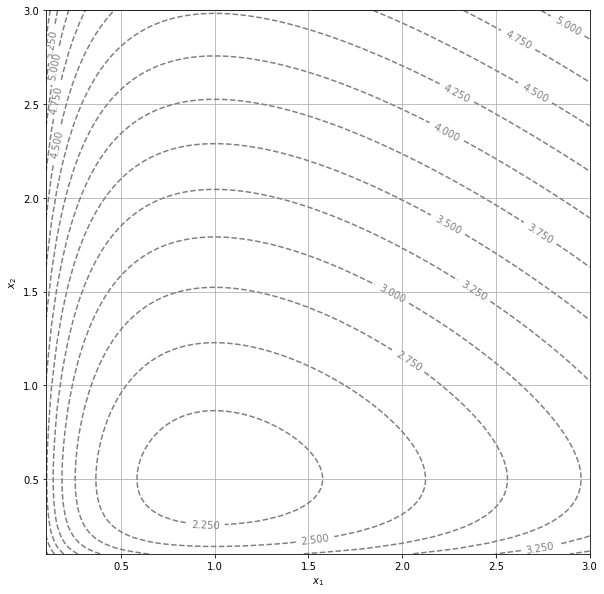

In [4]:
def H(x1,x2):
    '''on impl√©mente la fonction H'''
    x1 = np.array(x1)
    x2 = np.array(x2)
    return delta*x1-gamma*np.log(x1)+beta*x2-alpha*np.log(x2)

display_contour(
    H,
    x=np.linspace(0.1, 3.0, 100),
    y=np.linspace(0.1, 3.0, 100),
    levels=15, # 5 levels, automatically selected
)



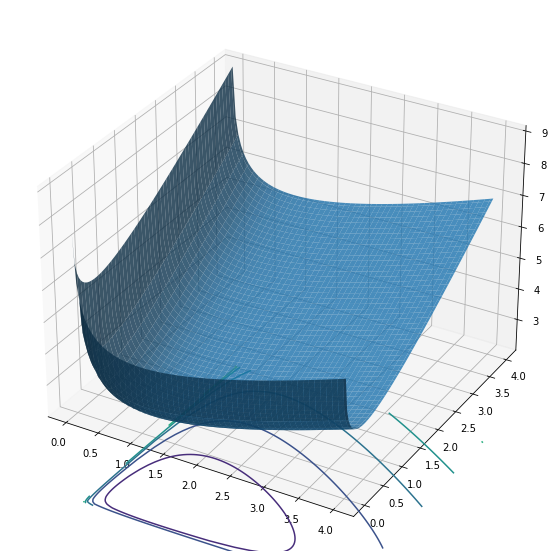

In [5]:
from mpl_toolkits.mplot3d import Axes3D # permet d'utiliser l'attribut projection="3d"

x = np.linspace(0.01, 4.0, 100)
y = x.copy()
X, Y = np.meshgrid(x, y)


Z = H(X,Y)

plt.figure()
ax = plt.axes(projection="3d")

ax.contour(X, Y, Z, zdir="z", offset=-1) # projection sur le plan z = -1
ax.plot_surface(X, Y, Z, alpha=0.8);

On observe donc que  ÃÑx se trouve √† l'extr√©mit√© du col, form√© par la courbe de f. On peut en d√©duire que l'ensemble des solutions converge vers ce col, atteint en ÃÑx. 
On sait par ailleurs qu'une ÃÑx solution est stable si les solutions restent arbitrairement proches de ÃÑx quand elles sont initialis√©es suffisamment proche de ÃÑx. On peut donc en d√©duire graphiquement que  ÃÑx est stable.

$\underline{Question~6:}$

Coder une fonction du type :

def solve_euler_explicit(f, x0, dt, t0, tf):

    ... 

    return t, x 

prenant en entr√©e une fonction $f : \mathbb{R}√ó \mathbb{R^{n}} ‚Üí \mathbb{R^{n}}$ quelconque, une condition
initiale ${x_0}$, un pas de temps $dt$, les temps initiaux et finaux, et renvoyant le vecteur des temps $t^{j}$ et de la solution $x^{j}$ du sch√©ma d‚ÄôEuler explicite appliqu√© √† $x' = f(t, x)$. La tester sur une √©quation diff√©rentielle aux
solutions exactes connues. V√©rifier la convergence du sch√©ma lorsque $dt$
tend vers 0. Comment visualiser graphiquement l‚Äôordre de convergence ?

In [6]:
def solve_euler_explicit(f2, xx0, dt, t0, tf): #x0 est un vecteur colonne et f doit renvoyer un vecteur colonne
    xj = xx0
    tj = t0
    (n,a)=np.shape(xx0)
    N = int(np.ceil((tf - t0) / dt))   #N est le nombre de fois qu'on va r√©p√©ter la m√©thode
    x = np.zeros((N+1,n))
    x[0]=xx0.T
    t = [t0]
    for j in range(N): 
        x[j+1] = x[j] + dt * f2(t[j],np.array([x[j]]).T).T
        t += [t[j] + dt]
    x=x.T
    return t, x          #chaque colonne de x correspond √† un xj

Testons cette fonction pour l'√©quation $x'=1-x$ avec ${x_0}=0$, $dt=0.1$, ${t_0}=0$ et ${t_f}=5$.

On a $f(x,t)=1-x(t)$ √† valeur dans $\mathbb{R}$ et l'unique solution de ce probl√®me de Cauchy est x(t)=1-exp(-t).

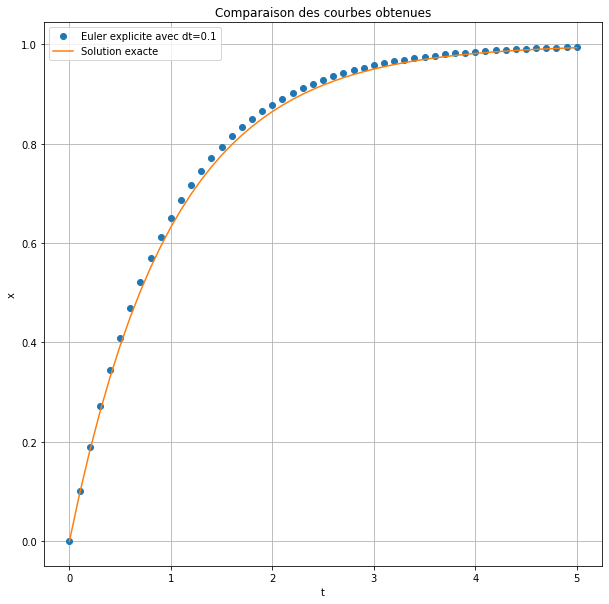

In [7]:
def f1(t,x):
    return np.array([[1-x]])

(t,xa) = solve_euler_explicit(f1, np.array([[0]]), 0.1, 0, 5)
x=xa[0]
y = [1-exp(-a) for a in t]
plt.title("Comparaison des courbes obtenues")
plt.xlabel('t')
plt.ylabel('x')
plt.grid(True)
plt.plot(t,x,'o', label="Euler explicite avec dt=0.1")
plt.plot(t,y, label="Solution exacte")
plt.legend() ;

Testons maintenant cette fonction pour $dt=0.01$, les deux courbes devraient √™tre plus proches car le pas de temps est 10 fois plus petit. 

(on trace seulement 50 points pour une meilleure lisibilit√©)

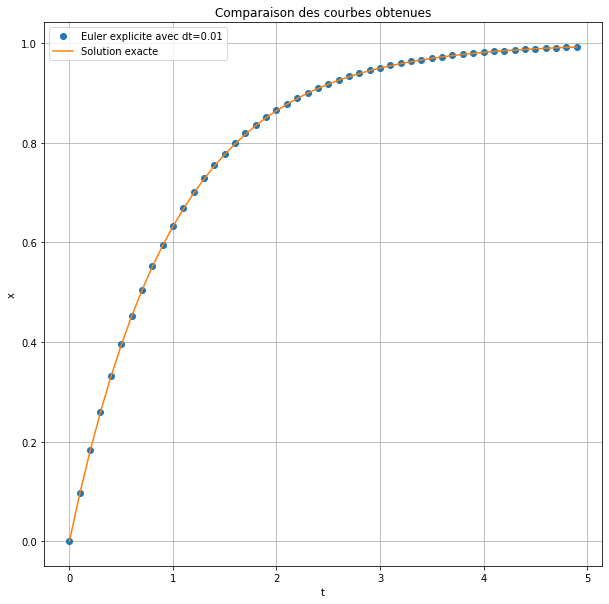

In [8]:
(t1,xa) = solve_euler_explicit(f1, np.array([[0]]), 0.01, 0, 5)
t=[t1[k*10] for k in range(50)]
x1=xa[0]
x=[x1[k*10] for k in range(50)]

y = [1-exp(-a) for a in t]
plt.title("Comparaison des courbes obtenues")
plt.xlabel('t')
plt.ylabel('x')
plt.grid(True)
plt.plot(t,x, 'o',label="Euler explicite avec dt=0.01")
plt.plot(t,y, label="Solution exacte")
plt.legend() ;

On constate effectivement que les courbes sont plus proches pour $dt=0.01$ que pour $dt=0.1$.

V√©rifions graphiquement la convergence du sch√©ma lorsque $dt$ tend vers 0.

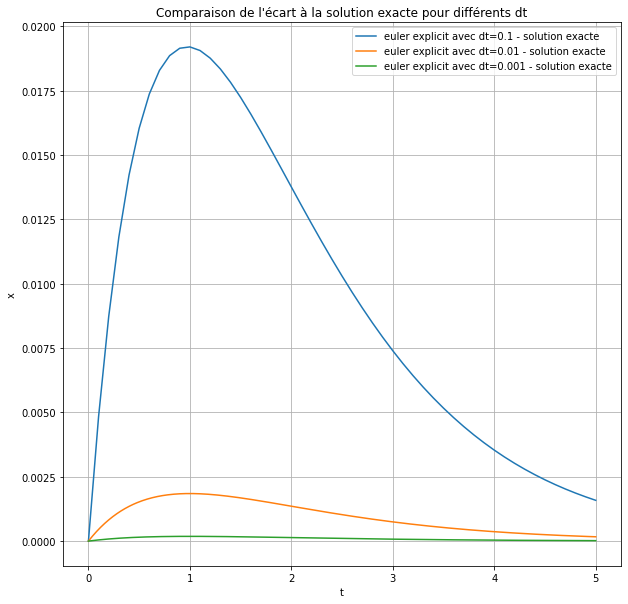

In [9]:
(t1,xa1) = solve_euler_explicit(f1, np.array([[0]]), 0.01, 0, 5)
(t2,xa2) = solve_euler_explicit(f1, np.array([[0]]), 0.1, 0, 5)
(t3,xa3) = solve_euler_explicit(f1, np.array([[0]]), 0.001, 0, 5)
x1=xa1[0]
x2=xa2[0]
x3=xa3[0]

y1 = [1-exp(-a) for a in t1]
y2 = [1-exp(-a) for a in t2]
y3 = [1-exp(-a) for a in t3]
plt.title("Comparaison de l'√©cart √† la solution exacte pour diff√©rents dt")
plt.xlabel('t')
plt.ylabel('x')
plt.grid(True)
plt.plot(t2,x2-y2, label="euler explicit avec dt=0.1 - solution exacte")
plt.plot(t1,x1-y1, label="euler explicit avec dt=0.01 - solution exacte")
plt.plot(t3,x3-y3, label="euler explicit avec dt=0.001 - solution exacte")
plt.legend() ;

Avant de visualiser l'ordre de convergence de ce sch√©ma, on souhaite montrer que le sch√©ma d'Euler est convergent d'ordre 1.

- Montrons tout d'abord qu'un tel sch√©ma est consistant d'ordre 1:

On a $f(t,x)=1-x(t)$.

Donc $f$ est de classe $\mathbb{C^1}$ car $x$ est de classe $\mathbb{C^1}$.

On a donc:
$$
Jf(x,t)=\begin{pmatrix}
1 & x(t)-1 
\end{pmatrix}
$$

Comme $x$ est de classe $\mathbb{C^1}$, $Jf(x,t)$ est de classe $\mathbb{C^1}$ donc $f$ est de classe $\mathbb{C^2}$.


Par ailleurs, L‚Äôerreur de troncature s‚Äô√©crit :

$Œ∑^{j+1}= \frac{x({t_j}+dt)-(x({t_j})+dt\cdot f({t_j},x({t_j})))}{dt}$

Or, comme $f$ est $\mathbb{C^1}$,  $x$ est $\mathbb{C^2}$ et par application la formule de Taylor avec reste int√©gral, on obtient :

$$
x({t_j}+dt)=x({t_j})+dt f({t_j},x({t_j}))+dt^{2} \cdot  \int_{0}^{1} x"({t_j}+s \cdot dt) \cdot (1-s) \, \mathrm{d}s 
$$

En utilisant √† pr√©sent $x'({t_j})=f({t_j},x({t_j}))$, on a:

$$
\| Œ∑^{j+1} \| \le dt^{2} \cdot  \int_{0}^{1} x"({t_j}+s \cdot dt) \cdot (1-s) \, \mathrm{d}s \le \frac{dt}{2} \cdot \max\limits_{t\in [{t_j},{t_{j+1}}]} \| x"(t) \| \le \frac{dt}{2} \cdot \max\limits_{t\in [0,{t_f}]} \| x"(t) \|
$$

Par d√©finition, on peut alors en d√©duire que le sch√©ma d‚ÄôEuler explicite est donc consistant d‚Äôordre $\geq 1$.

Or, f est de classe $\mathbb{C^2}$, donc:

$$
\frac{\partial \Phi (t,x,0)}{\partial dt}= 0  \ne f^{[1]}(t,x)={\partial_t}f(t,x)+{\partial_x}f(t,x) \cdot f(t,x)
$$

Et donc le sch√©ma d'Euler est consistant d'ordre 1.

- De plus, comme $f$ est de classe $\mathbb{C^1}$ par rapport √† x, donc $\Phi(t,x)=f(x,t,dt)$ est de classe $\mathbb{C^1}$ par rapport √† x. Ainsi, d'apr√®s le th√©or√®me de condition suffisante de convergence, on peut affirmer que le sch√©ma d'Euler explicite est convergent d'ordre 1.


Pour v√©rifier √† pr√©sent graphiquement que l'ordre de convergence est 1, il faut v√©rifier que l'"erreur maximale", d√©finie par $\max\limits \| x^{j}-x(t_j) \|$ soit proportionnelle √† $dt$. Il faut donc calculer cette erreur pour un nombre arbitrairement grand de dt diff√©rents (nous avons d√©cid√© de mettre par d√©faut 100 dt diff√©rents dans la fonction qui suit) et tracer avec une √©chelle logarithmique (car l'√©chelle logarithmique permet de v√©rifier que deux fonctions sont proportionelles) cette erreur en fonction de dt ainsi que dt en fonction de dt. Si on obtient deux "droites" parall√®les, il sera possible d'affirmer que l'ordre de convergence est bien 1.

In [10]:
def erreur_max(f2, xexact1, x0, dt, t0, tf):
    (t,xeuler)=solve_euler_explicit(f2, x0, dt, t0, tf)
    xeuler=xeuler.T
    xexact2= xexact1.T
    return max(np.linalg.norm((xeuler[i] - xexact2[i])) for i in range (len(t)))

In [11]:
def j(f2, xexact1, x0, t0, tf, dtmin=10**(-3), dtmax=10**(-1), N=100):
    dtt = (dtmax-dtmin)/N
    DT = []
    erreurmax = []
    for j in range(N):
        (t,z) = solve_euler_explicit(f2, x0, dtmin + j*dtt, t0, tf)
        xexact2 = np.array([xexact1(a).T[0] for a in t])
        erreurmax += [erreur_max(f2, xexact2, x0, dtmin + j*dtt, t0, tf)]
        DT += [dtmin + j*dtt]
    return DT, erreurmax

In [12]:
def xexact (a):
    return np.array([1-exp(-a)])

DTT, erreurmaxx = j(f1, xexact, np.array([[0]]), 0, 5)

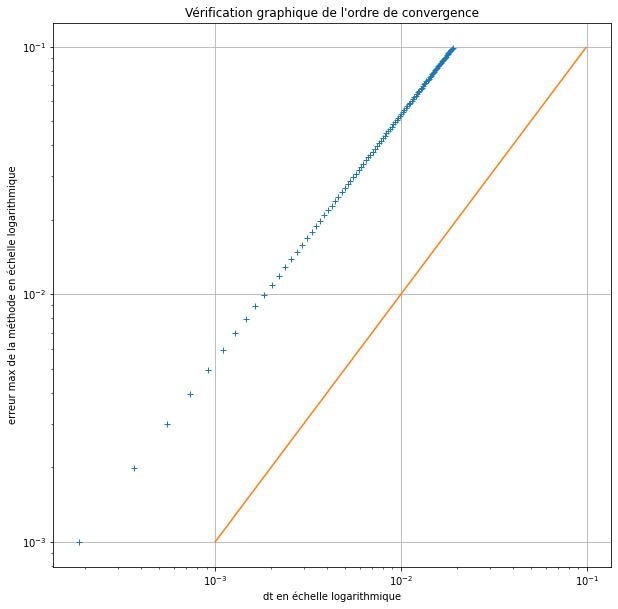

In [13]:
plt.title("V√©rification graphique de l'ordre de convergence")
plt.xlabel('dt en √©chelle logarithmique')
plt.ylabel('erreur max de la m√©thode en √©chelle logarithmique')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.plot(erreurmaxx, DTT, '+', label="erreur pour euler explicit")
plt.plot(DTT, DTT, label="convergence d'ordre 1") ;

On v√©rifie donc bien graphiquement que le sch√©ma est convergent d'ordre 1.

$\underline{Question~7:}$

Utiliser le sch√©ma d‚ÄôEuler explicite pour simuler les √©quations de LotkaVolterra. Que constate-t-on en temps long ? Cette r√©solution vous semblet-elle fid√®le √† la r√©alit√© ? On pourra tracer l‚Äô√©volution de la fonction $H$.

On utilise, pour r√©pondre √† cette question les r√©sultats obtenus √† la question pr√©c√©dente.

In [14]:
#valeurs utiles √† la r√©solution de la question 7
t0=0
tf=10
x0=2
y0=2
dt=0.01

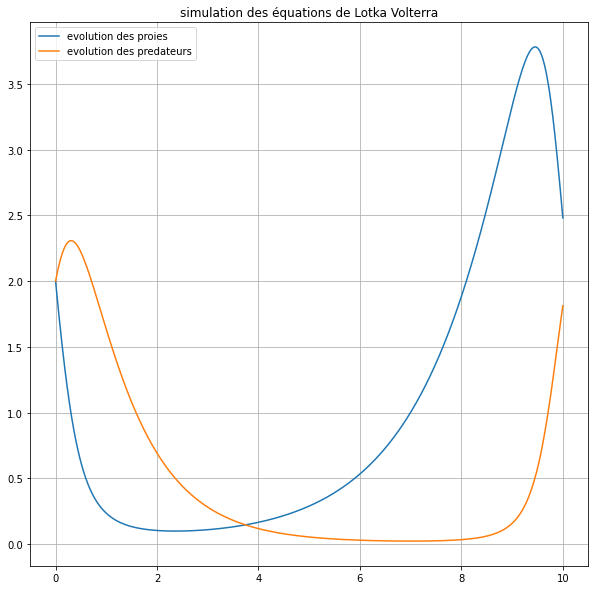

In [15]:
def F(t,x1,x2):
    return x1*alpha-beta*x1*x2

def G(t,x1,x2):
    return -x2*gamma+x2*x1*delta
    
X0=np.array([[x0],[y0]])

def g(t,X):
    return np.array([[F(t,X[0][0],X[1][0])],[G(t,X[0][0],X[1][0])]])



t,X12=solve_euler_explicit(g, X0, dt, t0, tf)
x1=X12[0]
x2=X12[1]
plt.grid(True)
plt.title("simulation des √©quations de Lotka Volterra")
plt.plot(t,x1,label="evolution des proies")
plt.plot(t,x2,label="evolution des predateurs")
plt.legend();


On constate donc que des incoh√©rences apparaissent aux temps "longs". En effet:
- Alors que vers $t=7$, le nombre de proies atteint presque 0 et le nombre de pr√©dateurs 1.0, le nombre de proies conna√Æt une croissance importante, jusqu'√† d√©passer le nombre de pr√©dateurs. En termes pratiques, cette √©volution semble √©trange car si les pr√©dateurs sont en surnombre et que les proies ne se reproduisent pas plus vite que les pr√©dateurs, il n'existe pas de raison pour qu'elles survivent.  

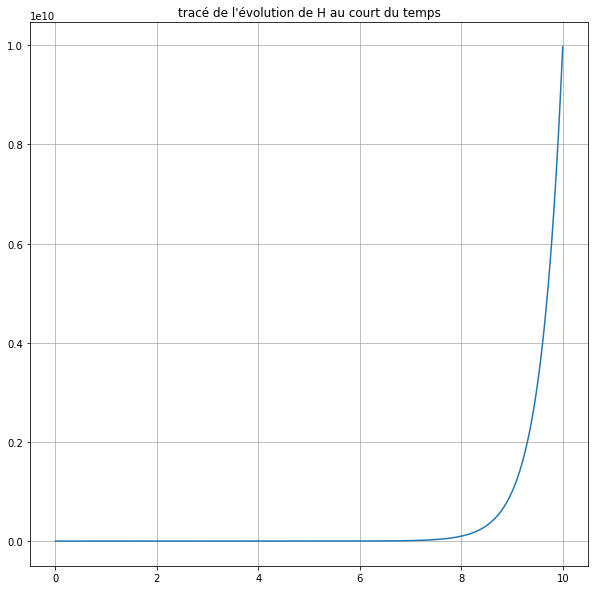

In [16]:
def H(t,x):
    y1,y2=x
    y1 = np.array(y1)
    y2 = np.array(y2)
    return delta*y1-gamma*np.log(y1)+beta*y2-alpha*np.log(y2)

t1,xa = solve_euler_explicit(H, np.array([[x0],[y0]]), dt, t0, tf)
plt.grid(True)
plt.title("trac√© de l'√©volution de H au court du temps")
plt.plot(t1,xa[0]);

D'apr√®s la question $4$, la valeur de $H$ est suppos√©e √™tre constante. Cependant, on observe dans cette simulation que vers $t=7$, H cesse d'√™tre constante et cro√Æt. Cette observation vient valider les incoh√©rences pr√©c√©demment observ√©es, et indiquent qu'il existe un probl√®me de pr√©cision de la m√©thode num√©rique de la r√©solution des √©quations diff√©rentielles: la m√©thode d'Euler explicite semble induire une erreur ici. 

$\underline{Question~8:}$

Coder maintenant une fonction du type :

def solve_euler_implicit(f, x0, dt, t0, tf, itermax = 100):

    ...

    return t, x

donnant la solution d‚Äôun sch√©ma d‚ÄôEuler implicite appliqu√© √† $xÀô = f(t, x)$ selon la m√©thode pr√©sent√©e dans le cours. 

V√©rifier de nouveau sa convergence sur des solutions connues. Que se passe-t-il cette fois-ci sur les
√©quations de Lotka-Volterra ?


In [17]:
def solve_euler_implicit(f2, xx0, dt, t0, tf, itermax = 100):
    xj = xx0
    tj = t0
    (n,a)=np.shape(xx0)
    N = int(np.ceil((tf - t0) / dt))   #N est le nombre de fois qu'on va r√©p√©ter la m√©thode
    x = np.zeros((N+1,n))
    x[0] = xx0.T
    (t,x1) = solve_euler_explicit(f2, xx0, dt, t0, tf)
    for j in range(N):
        xi = x1.T[j] + dt* f2(t[j], np.array([x[j]]).T).T                #xi=xj+1,0
        def F(a):
            return x[j]+dt*f2(t[j+1],a).T
        for k in range(itermax):
            xi= F(np.array(xi).T)                #xi=xj+1,k
        x[j+1]=xi
    x=x.T
    return t, x 

Testons cette fonction sur la m√™me √©quation diff√©rentielle que dans la question 6, avec ${x_0}=0$, $dt=0.1$, ${t_0}=0$, ${t_f}=5$ et $itermax=100$.

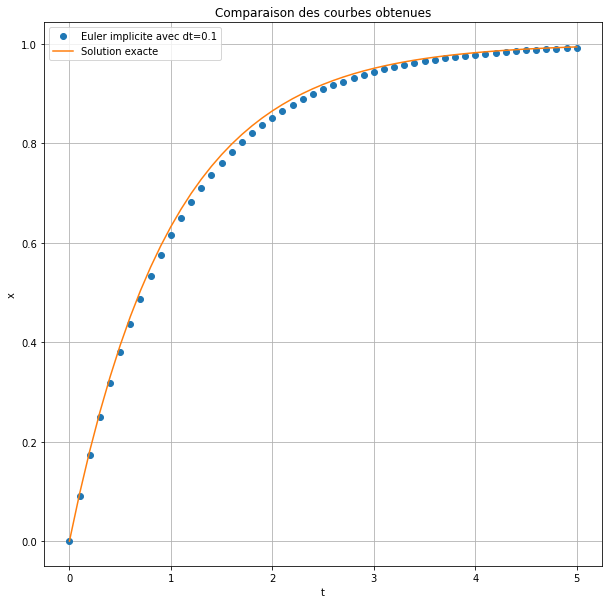

In [18]:
(t,xa) = solve_euler_implicit(f1, np.array([[0]]), 0.1, 0, 5, 100)
x=xa[0]
y = [1-exp(-a) for a in t]
plt.title("Comparaison des courbes obtenues")
plt.xlabel('t')
plt.ylabel('x')
plt.grid(True)
plt.plot(t,x,'o', label="Euler implicite avec dt=0.1")
plt.plot(t,y, label="Solution exacte")
plt.legend() ;

Testons maintenant cette fonction pour $dt=0.01$, les deux courbes devraient √™tre plus proches car le pas de temps est 10 fois plus petit. 

(on trace seulement 50 points pour une meilleure lisibilit√©)

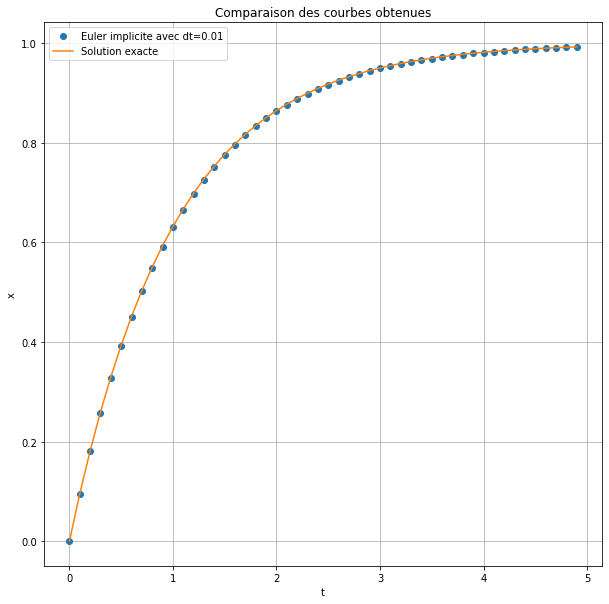

In [19]:
(t1,xa) = solve_euler_implicit(f1, np.array([[0]]), 0.01, 0, 5, 100)
t=[t1[k*10] for k in range(50)]
x1=xa[0]
x=[x1[k*10] for k in range(50)]

y = [1-exp(-a) for a in t]
plt.title("Comparaison des courbes obtenues")
plt.xlabel('t')
plt.ylabel('x')
plt.grid(True)
plt.plot(t,x, 'o',label="Euler implicite avec dt=0.01")
plt.plot(t,y, label="Solution exacte")
plt.legend() ;

On constate effectivement que les courbes sont plus proches pour $dt=0.01$ que pour $dt=0.1$.

Constatons graphiquement la convergence du sch√©ma lorsque $dt$ tend vers 0.

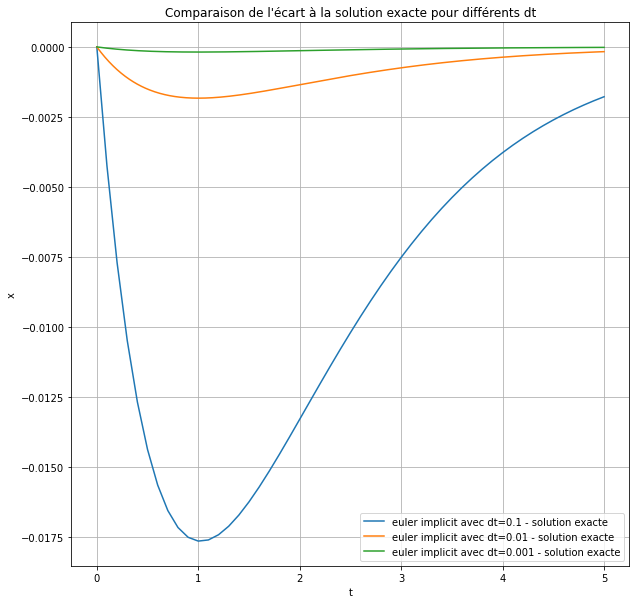

In [20]:
(t1,xa1) = solve_euler_implicit(f1, np.array([[0]]), 0.01, 0, 5, 100)
(t2,xa2) = solve_euler_implicit(f1, np.array([[0]]), 0.1, 0, 5, 100)
(t3,xa3) = solve_euler_implicit(f1, np.array([[0]]), 0.001, 0, 5, 100)
x1=xa1[0]
x2=xa2[0]
x3=xa3[0]

y1 = [1-exp(-a) for a in t1]
y2 = [1-exp(-a) for a in t2]
y3 = [1-exp(-a) for a in t3]
plt.title("Comparaison de l'√©cart √† la solution exacte pour diff√©rents dt")
plt.xlabel('t')
plt.ylabel('x')
plt.grid(True)
plt.plot(t2,x2-y2, label="euler implicit avec dt=0.1 - solution exacte")
plt.plot(t1,x1-y1, label="euler implicit avec dt=0.01 - solution exacte")
plt.plot(t3,x3-y3, label="euler implicit avec dt=0.001 - solution exacte")
plt.legend() ;

On observe donc bien, sur la courbe pr√©c√©dente, que le sch√©ma converge lorsque dt tend vers 0. On se propose alors de montrer que le sch√©ma d'Euler implicite est bien convergeant d'ordre 1, avant de le visualiser graphiquement. 

- On s'int√©resse tout d'abord √† l'ordre de consistance d'un tel sch√©ma num√©rique:
on note $Œ∑^{j+1}$ l'erreur de troncature √† l'it√©ration $j$, qui se d√©finit ainsi:
$$
Œ∑^{j+1}= \frac{x({t_{j+1}})-x({t_j}) - \Delta t f ({t_j}, x^{j+1})}{\Delta t}
$$
Or, on a:
$$
x^{j+1}=x({t_j}) + \Delta t f({t_j},x^{j+1})
$$
On peut alors √©crire que: 
$$
x^{j+1}=x({t_j}) + O(\Delta t)
$$
Et donc que:
$$ 
f({t_{j+1}},x^{j+1})=f({t_j},x^{j}) + O(\Delta t)
$$
Ainsi, dans la premi√®re expression de $Œ∑^{j+1}$, on obtient:
$$
Œ∑^{j+1}=\frac{x({t_{j+1}})-(x({t_j}) +\Delta t f ({t_j}, x^{j}) + O(\Delta t^{2}))}{\Delta t}= O(\Delta t)
$$
D'apr√®s la d√©finition de l'ordre de consistance d'un sch√©ma num√©rique, on obtient bien que le sch√©ma d'Euler implicite est consistant d'ordre 1. 
- D'apr√®s le raisonnement pr√©c√©dent, il suffit, pour montrer l'ordre de convergence de ce sch√©ma, de montrer que les applications $\Phi_{\Delta t}({t_j})$ est globalement lipschitzienne. 
Or, une telle application est d√©finie de fa√ßon implicite dans un tel sch√©ma. D'apr√®s la d√©finition de cette m√©thode, on peut √©crire, pour des pas de temps faibles (entre les temps $y$ et $x$ proches):
$$
\Phi_{\Delta}(t,x)=\frac{y-x}{\Delta t}
$$ 
o√π $y= x + \Delta t f(t,y)$, ce qui revient √† √©crire: \Phi_{\Delta}(t,x)=f(t,y)
On a alors:
$$
\Phi_{\Delta}(t,x)= f(t+ \Delta, y)=f(t + \Delta, x + \Delta t f(t,y))=f(t + \Delta, x + \Delta t \Phi_{\Delta}(t,x))
$$
On a alors, lorsque l'on prend ({x_1},{x_2}):
$$
|\Phi_{\Delta}(t,{x_1})-\Phi_{\Delta}(t,{x_2})| <= m* |{x_1} + Delta t \Phi_{\Delta}(t,{x_1})- ({x_2} + Delta t \Phi_{\Delta}(t,{x_2}))|
$$

In [ ]:
def erreur_max(f2, xexact1, x0, dt, t0, tf):
    (t,xeuler)=solve_euler_explicit(f2, x0, dt, t0, tf)
    xeuler=xeuler.T
    xexact2= xexact1.T
    return max(np.linalg.norm((xeuler[i] - xexact2[i])) for i in range (len(t)))

In [ ]:
def j(f2, xexact1, x0, t0, tf, dtmin=10**(-3), dtmax=10**(-1), N=100):
    dtt = (dtmax-dtmin)/N
    DT = []
    erreurmax = []
    for j in range(N):
        (t,z) = solve_euler_explicit(f2, x0, dtmin + j*dtt, t0, tf)
        xexact2 = np.array([xexact1(a).T[0] for a in t])
        erreurmax += [erreur_max(f2, xexact2, x0, dtmin + j*dtt, t0, tf)]
        DT += [dtmin + j*dtt]
    return DT, erreurmax

In [ ]:
def xexact (a):
    return np.array([1-exp(-a)])

DTT, erreurmaxx = j(f1, xexact, np.array([[0]]), 0, 5)

In [ ]:
plt.title("V√©rification graphique de l'ordre de convergence")
plt.xlabel('dt en √©chelle logarithmique')
plt.ylabel('erreur max de la m√©thode en √©chelle logarithmique')
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.plot(erreurmaxx, DTT, '+', label="erreur pour euler explicit")
plt.plot(DTT, DTT, label="convergence d'ordre 1") ;

Suite √† l'√©tude pr√©cedent, on utilise un tel sch√©ma avec les √©quations de Lotka-Volterra :

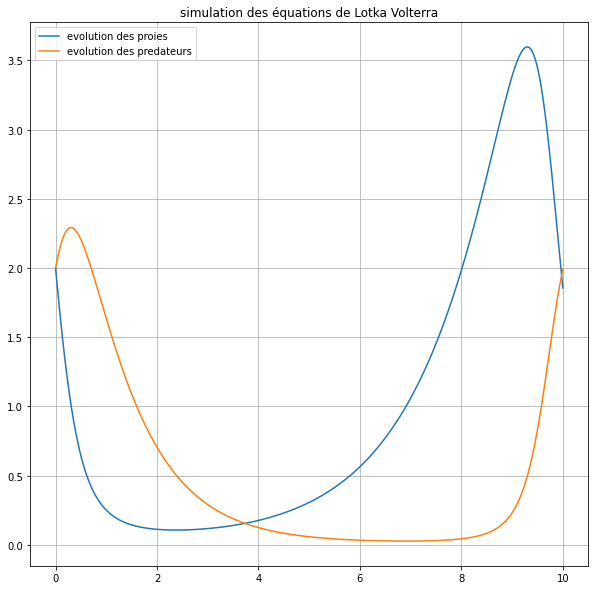

In [21]:
t,X12=solve_euler_implicit(g, X0, dt, t0, tf)
x1=X12[0]
x2=X12[1]
plt.grid(True)
plt.title("simulation des √©quations de Lotka Volterra")
plt.plot(t,x1,label="evolution des proies")
plt.plot(t,x2,label="evolution des predateurs")
plt.legend();

In [ ]:
def H(t,x):
    y1,y2=x
    y1 = np.array(y1)
    y2 = np.array(y2)
    return delta*y1-gamma*np.log(y1)+beta*y2-alpha*np.log(y2)

t1,xa = solve_euler_implicit(H, np.array([[x0],[y0]]), dt, t0, tf)
plt.grid(True)
plt.title("trac√© de l'√©volution de H au court du temps")
plt.plot(t1,xa[0]);

On observe donc les m√™mes incoh√©rences que lors de l'utilisation du shc√©ma d'Euler explicite. En effet, les variations des populations des proies et des pr√©dateurs connaissent les m√™mes √©volutions incho√©rentes, et $H$ n'est pas constant pour "$t$ grand". 

On propose maintenant de modifier ces sch√©mas de fa√ßon √† stabiliser $H$ et assurer sa conservation le long des solutions num√©riques.

$\underline{Question~9:}$

Expliquer pourquoi les solutions de:ÃáÃá
$$
\left\{ 
     \begin{array}
        \\{x_1}'={x_1}(Œ±‚àíŒ≤{x_2})‚àí{u_1}({x_1},{x_2})(H({x_1},{x_2})‚àí{H_0})\\
        {x_2}'=‚àí{x_2}(Œ≥‚àíŒ¥{x_1})‚àí{u_2}({x_1},{x_2})(H({x_1},{x_2})‚àí{H_0})
    \end{array}
\right.
$$
sont identiques √† celles de Lotka-Volterra si ${H_0}=H(x(0))$ pour tout choix de $u:\mathbb{R_{2}}‚Üí\mathbb{R_{2}}$ contin√ªment diff√©rentiable.

D'apr√®s le Th√©or√®me de Cauchy Lipschitz utilis√© √† la question 3, on peut affirmer que dans le cas du syst√®me de Lokta Volterra, il y a unicit√© de la solution maximale. On pose $\overrightarrow{x}=({x_1},{x_2})$ cette solution. 

On veut alors montrer que cette solution est bien solution du syst√®me d'√©quations diff√©rentielles pr√©c√©dent, √† condition que ${H_0}=H(x(0))$ et en prenant $u:\mathbb{R_{2}}‚Üí\mathbb{R_{2}}$ contin√ªment diff√©rentiable. 

On sait que :
$$
{x'_1}={x_1}(Œ±‚àíŒ≤ \cdot {x_2})
$$
$$
{x'_2}=‚àí{x_2}(Œ≥‚àíŒ¥ \cdot {x_1})
$$ 
Donc, dans le syst√®me pr√©c√©dent:
$$
\left\{ 
     \begin{array}
        \\{x_1}(Œ±‚àíŒ≤{x_2})={x_1}(Œ±‚àíŒ≤{x_2})‚àí{u_1}({x_1},{x_2})(H({x_1},{x_2})‚àí{H_0})\\
        ‚àí{x_2}(Œ≥‚àíŒ¥{x_1})=‚àí{x_2}(Œ≥‚àíŒ¥{x_1})‚àí{u_2}({x_1},{x_2})(H({x_1},{x_2})‚àí{H_0})
    \end{array}
\right.
$$
Soit: 
$$
\left\{ 
     \begin{array}
        \\0=‚àí{u_1}({x_1},{x_2})(H({x_1},{x_2})‚àí{H_0})\\
        0=‚àí{u_2}({x_1},{x_2})(H({x_1},{x_2})‚àí{H_0})
    \end{array}
\right.
$$
Or, on a vu √† la question 4 que le long des solutions du syst√®me de Lokta Volterra intialis√©es dans $\mathbb{R_{>0}} √ó \mathbb{R_{>0}}$, $H$ √©tait constante. On a donc bien, pour le $\overrightarrow{x}$ choisi, $H({x_1},{x_2})=H(x(0))$. On a donc $\overrightarrow{x}$ solution du syst√®me pr√©c√©dent. 

R√©ciproquement, on peut appliquer le th√©or√®me de Cauchy Lipschitz au nouveau syst√®me d'√©quations diff√©rentielles car, sous l'hypoth√®se que $u:\mathbb{R_{2}}‚Üí\mathbb{R_{2}}$ soit contin√ªment diff√©rentiable, la fonction $f$ suivante l'est aussi ce qui permet d'affirmer l'unicit√© d'une solution maximale √† ce syst√®me. 
$$
f=\begin{pmatrix} 
    {x_1}(Œ±‚àíŒ≤{x_2})‚àí{u_1}({x_1},{x_2})(H({x_1},{x_2})‚àí{H_0})\\ 
    ‚àí{x_2}(Œ≥‚àíŒ¥{x_1})‚àí{u_2}({x_1},{x_2})(H({x_1},{x_2})‚àí{H_0}
\end{pmatrix}
$$ 
On peut donc en conclure que les solutions de ces deux syst√®mes sont identiques. 

$\underline{Question~10:}$

Soit ${H_0} \in \mathbb{R}$. Calculer la d√©riv√©e de $H‚àí{H_0}$ le long des solutions de ce nouveau syst√®me. Montrer que l‚Äôon peut choisir $u$ tel que $\frac{d}{dt}(H(x(t))‚àí{H_0}) =‚àík‚Äñ‚àáH(x(t))‚Äñ^{2}(H(x(t))‚àí{H_0})$.En d√©duire qu‚Äôalors $H(x(t))$ converge exponentiellement vers ${H_0}$ lorsque $t$ tend vers l‚Äôinfini si $x$ reste √† une distance strictement positive de ÃÑx.

- Soit $u: \mathbb{R^2}‚Üí\mathbb{R^2}$ contin√ªment diff√©rentiable.
Soit $x$ une solution du nouveau syst√®me et $I$ son domaine de d√©finition.
$\forall t \in I, \frac{d}{dt}(H(x(t))‚àí{H_0}) =\frac{dH}{dt}(x(t))=Œ¥ \cdot {x'_1}(t)‚àíŒ≥ \cdot \frac{{x'_1}(t)}{{x_1}(t)}+Œ≤ \cdot {x'_2}(t)‚àíŒ± \cdot \frac{{x'_2}(t)}{{x_2}(t)}$

Comme 

$$
\left\{ 
     \begin{array}
        \\{x_1}'={x_1}(Œ±‚àíŒ≤{x_2})‚àí{u_1}({x_1},{x_2})(H({x_1},{x_2})‚àí{H_0})\\
        {x_2}'=‚àí{x_2}(Œ≥‚àíŒ¥{x_1})‚àí{u_2}({x_1},{x_2})(H({x_1},{x_2})‚àí{H_0})
    \end{array}
\right.
$$

On a :

$\forall t \in I, \frac{d}{dt}(H(x(t))‚àí{H_0}) = (‚àíŒ¥{u_1}(t)+Œ≥\frac{{u_1}(t)}{{x_1}(t)}-Œ≤{u_2}(t)+Œ±\frac{{u_2}(t)}{{x_2}(t)})\cdot (H({x_1}(t),{x_2}(t))-{H_0})$
- Montrons que l‚Äôon peut choisir $u$ tel que $\frac{d}{dt}(H(x(t))‚àí{H_0}) =‚àík‚Äñ‚àáH(x(t))‚Äñ^{2}(H(x(t))‚àí{H_0})$.

Soit $x$ une solution du nouveau syst√®me et $I$ son domaine de d√©finition.

Soit $k \in \mathbb{R}$

$\forall t \in I, ‚àík‚Äñ‚àáH(x(t))‚Äñ^{2}=‚àík \cdot (Œ¥^{2}+Œ≤^{2}-2\frac{Œ¥Œ≥}{{x_1}(t)}-2\frac{Œ≤Œ±}{{x_2}(t)}+\frac{Œ≥^2}{{x_1}^{2}(t)}+\frac{Œ±^2}{{x_2}^{2}(t)})$

On pose $u=({u_1},{u_2}): \mathbb{R^2}‚Üí\mathbb{R^2}$ et $({u_1},{u_2})=-k \cdot (-Œ¥+\frac{Œ¥Œ≥}{{x_1}},-Œ≤+\frac{Œ±}{{x_2}})$, $u$ est bien contin√ªment diff√©rentiable.

$\forall t \in I, ‚àíŒ¥{u_1}(t)+Œ≥\frac{{u_1}(t)}{{x_1}(t)}-Œ≤{u_2}(t)+Œ±\frac{{u_2}(t)}{{x_2}(t)}) = -k \cdot [ Œ¥^{2}-\frac{Œ¥Œ≥}{{x_1}(t)}+\frac{Œ≥^2}{{x_1}^{2}(t)}-\frac{Œ¥Œ≥}{{x_1}(t)}+Œ≤^{2}-\frac{Œ≤Œ±}{{x_2}(t)}+\frac{Œ±^2}{{x_2}^{2}(t)}-\frac{Œ≤Œ±}{{x_2}(t)}]=‚àík‚Äñ‚àáH(x(t))‚Äñ^{2}$.

Donc, pour tout $k \in \mathbb{R}$, on peut bien choisir $u$ tel que $\frac{d}{dt}(H(x(t))‚àí{H_0}) =‚àík‚Äñ‚àáH(x(t))‚Äñ^{2}(H(x(t))‚àí{H_0})$ ( on choisit $u=-k \cdot (-Œ¥+\frac{Œ¥Œ≥}{{x_1}},-Œ≤+\frac{Œ±}{{x_2}})$ qui est bien contin√ªment diff√©rentiable).

- Montrons que $H(x(t))$  converge exponentiellement vers  $H_0$  lorsque  ùë°  tend vers l‚Äôinfini si  ùë•  reste √† une distance strictement positive de ÃÑx.

On suppose que ùë•  reste √† une distance strictement positive de ÃÑx, ie il existe $c>0$ tel que $‚Äñx- ÃÑx‚Äñ \ge c >0$.

IL MANQUE LA JUSTIFICATION MAIS C'EST CE QUI EST ECRIT SUR DISCOURSE ET JSP JUSTIFIER POUR L'INSTANT

On a alors $‚Äñ‚àáùêª(ùë•(ùë°))‚Äñ \ge c > 0$

On choisit $k>0$¬≤

Puis comme $\frac{d}{dt}(H(x(t))‚àí{H_0}) =‚àík‚Äñ‚àáH(x(t))‚Äñ^{2}(H(x(t))‚àí{H_0})$

JUSTIFIER QUE $H(x(t))‚àí{H_0}$ EST STRICTEMENT POSITIF


On a $\frac{\frac{d}{dt}(H(x(t))‚àí{H_0})}{(H(x(t))‚àí{H_0})}=-k‚Äñ‚àáH(x(t))‚Äñ^{2} \le -kc^2$

On int√®gre par rapport au temps et par croissance de l'int√©grale et on obtient 

$ln(H(x(t))‚àí{H_0}) \le -kc^{2}t+constante$

Puis on compose par exp, et par croissance de l'exponentielle :

$0 < H(x(t))‚àí{H_0} \le exp(-kc^{2}t+constante)$

Donc 

$|H(x(t))‚àí{H_0}| \le exp(-kc^{2}t+constante)$

Donc $H(x(t))$ converge exponentiellement vers ${H_0}$ lorsque $t$ tend vers l‚Äôinfini (car $kc^{2}>0$) si $x$ reste √† une distance strictement positive de ÃÑx.



$\underline{Question~11:}$
En d√©duire comment modifier l‚Äôimpl√©mentation du sch√©ma d‚ÄôEuler pour assurer la stabilit√© de $H$. Quel est le r√¥le de $k$? Peut-il √™tre choisi arbitrairement grand ? Pourquoi ? On pourra exprimer $H(xj+1)‚àíH(x0)$ en fonction de $H(xj)‚àíH(x0)$ au premier ordre en $dt$.

On souhaite √† pr√©sent assurer la stabilit√© de $H$. D'apr√®s les questions pr√©c√©dentes, on a vu qu'en impl√©mentant un syst√®me d'√©quations diff√©rentielles diff√©rent, ayant les m√™mes solutions que celui qui nous int√©resse, et en choississant bien $u$, $H(x(t))$ converge exponentiellement vers ${H_0}$ si t tend vers l'infini et x strictement sup√©rieur √† ÃÑx.

On impl√©mente une nouvelle fois Euler mais avec les modifications pr√©c√©dentes:

In [22]:
#valeurs utiles √† la r√©solution de la question 11
t0=0
tf=10
x0=2
y0=2
dt=0.01

c:\users\mathi\miniconda3\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)


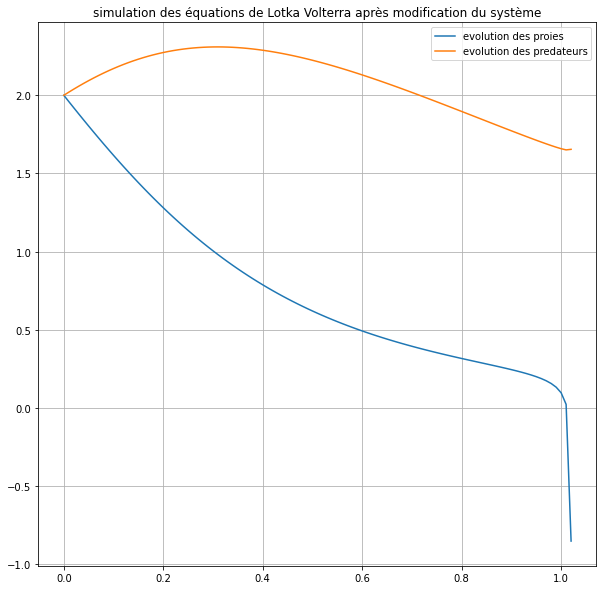

In [23]:
def H(t,x):
    x1,x2=x
    x1 = np.array(x1)
    x2 = np.array(x2)
    return delta*x1-gamma*np.log(x1)+beta*x2-alpha*np.log(x2)

def u1(x1,x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return -delta + (gamma*delta)/x1

def u2(x1,x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return -beta + (alpha)/x2

def F(t,x1,x2):
    x=np.array([x1,x2])
    y=np.array([x0,y0])
    return x1*alpha-beta*x1*x2-u1(x1,x2)*(H(t,x)-H(t,y))

def G(t,x1,x2):
    x=np.array([x1,x2])
    y=np.array([x0,y0])
    return -x2*gamma+x2*x1*delta-u2(x1,x2)*(H(t,x)-H(t,y))
    
def Euler2(F,G,t0,tf,x0,y0,dt) :
    '''on impl√©mente ici un nouvel Euler, plus adapt√© √† la r√©soltuion des √©quations coupl√©es'''
    t=t0
    x=x0
    y=y0
    n= int(np.ceil((tf - t0) / dt))
    h=(tf-t0)/float(n)
    temps=[t0]
    proies=[x0]
    predateurs=[y0]
    for i in range(n) :
        x,y=x+h*F(t,x,y),y+h*G(t,x,y)
        t=t+h
        temps.append(t)
        proies.append(x)
        predateurs.append(y)
    return temps,proies,predateurs

t,x1,x2=Euler2(F,G,t0,tf,x0,y0,dt)
plt.grid(True)
plt.title("simulation des √©quations de Lotka Volterra apr√®s modification du syst√®me")
plt.plot(t,x1,label="evolution des proies")
plt.plot(t,x2,label="evolution des predateurs")
plt.legend() ;

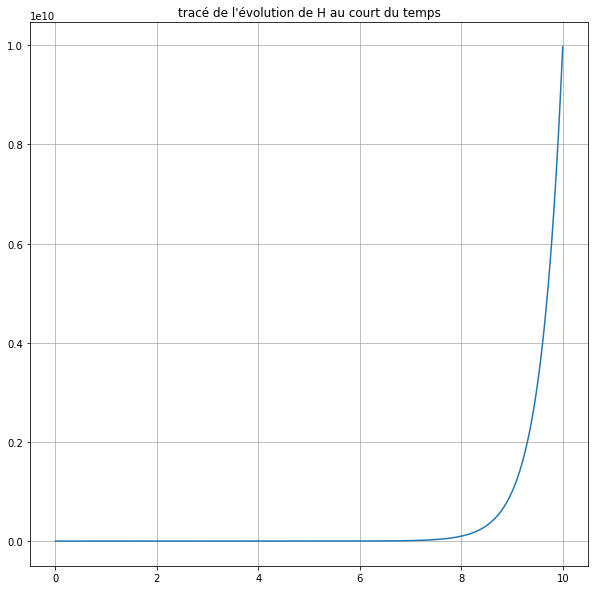

In [24]:
t1,xa = solve_euler_explicit(H, np.array([[x0],[y0]]), dt, t0, tf)
plt.grid(True)
plt.title("trac√© de l'√©volution de H au court du temps")
plt.plot(t1,xa[0]);